In [1]:
# Підключення  google-диску

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# шлях розташування датасетів

mypath = '/content/gdrive/MyDrive/data_hw6'

In [45]:
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
files = listdir(mypath)
files

['data_2d.csv', 'mnist.csv']

In [47]:
# Підключення до датасету data_2d.csv
file_path_data_2d = os.path.join(mypath, 'data_2d.csv')
data_2d = pd.read_csv(file_path_data_2d, header=None)
data_2d.head()

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


In [48]:
# Перевірка, чи перший стовпець у датасеті data_2d є унікальним
first_column_unique_values = data_2d.iloc[:, 0].unique()

first_column_unique_values

array([0., 1.])

In [49]:
# Перший стовпець у датасеті data_2d містить повторювані значення і ми можемо його ігнорувати для цілей кластеризації.

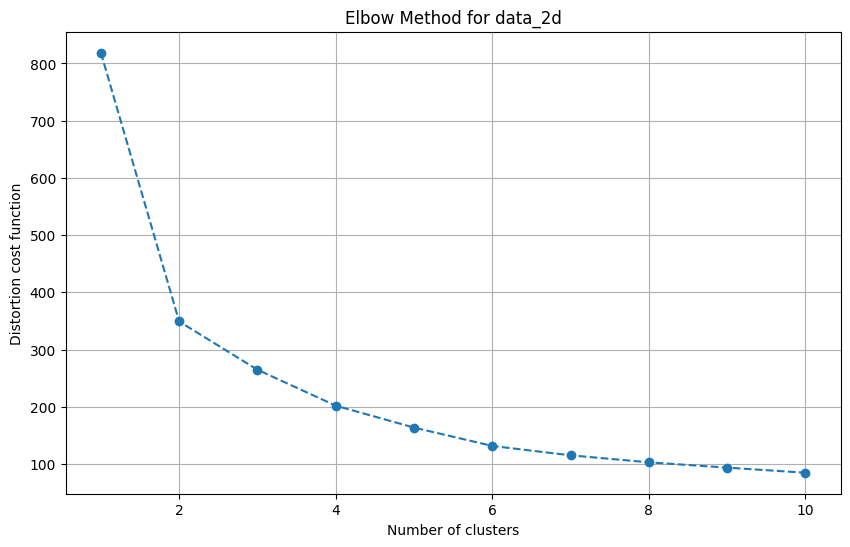

In [67]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Вибір даних для кластеризації (ігноруємо перший стовпець)
X_2d = data_2d.iloc[:, 1:]

# Застосування ліктевого методу для визначення оптимальної кількості кластерів
wcss_2d = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_2d)
    wcss_2d.append(kmeans.inertia_)

# Візуалізація ліктевого графіка
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_2d, marker='o', linestyle='--')
plt.title('Elbow Method for data_2d')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion cost function')
plt.grid(True)
plt.show()

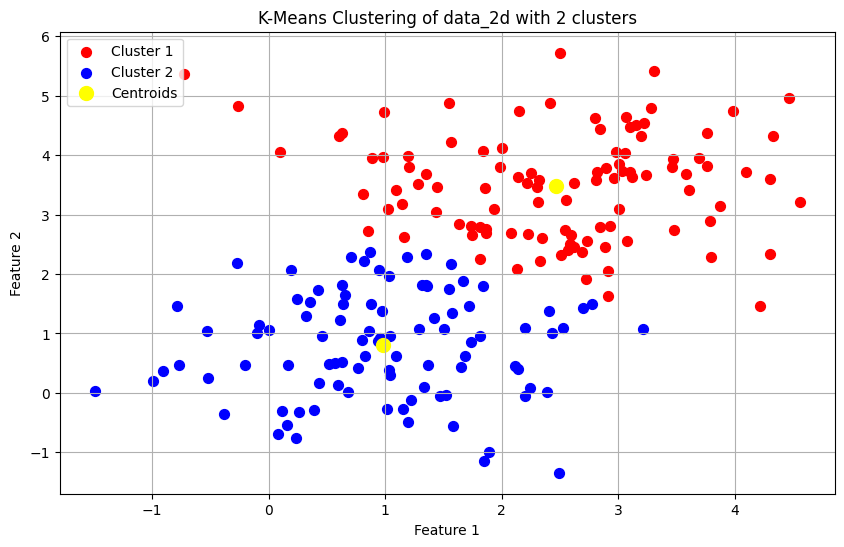

In [62]:
# Вибір даних для кластеризації (ігнорування першого стовпця)
X_2d = data_2d.iloc[:, 1:]

optimal_clusters_data_2d = 2
# Застосування K-means кластеризації з 3 кластерами
kmeans_2d = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_2d = kmeans_2d.fit_predict(X_2d)

# Візуалізація результатів кластеризації
plt.figure(figsize=(10, 6))
plt.scatter(X_2d.iloc[y_kmeans_2d == 0, 0], X_2d.iloc[y_kmeans_2d == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X_2d.iloc[y_kmeans_2d == 1, 0], X_2d.iloc[y_kmeans_2d == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title(f'K-Means Clustering of data_2d with {optimal_clusters_data_2d} clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
# Підключення до датасету mnist.csv
file_path_mnist = os.path.join(mypath, 'mnist.csv')
mnist = pd.read_csv(file_path_mnist, header=None)
mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
from sklearn.decomposition import PCA

# Вибір даних для PCA (всі стовпці, крім першого, який є міткою)
mnist_data = mnist.iloc[:, 1:]

# Застосування PCA для зменшення розмірності до 2 вимірів
pca = PCA(n_components=2)
mnist_2d = pca.fit_transform(mnist_data)

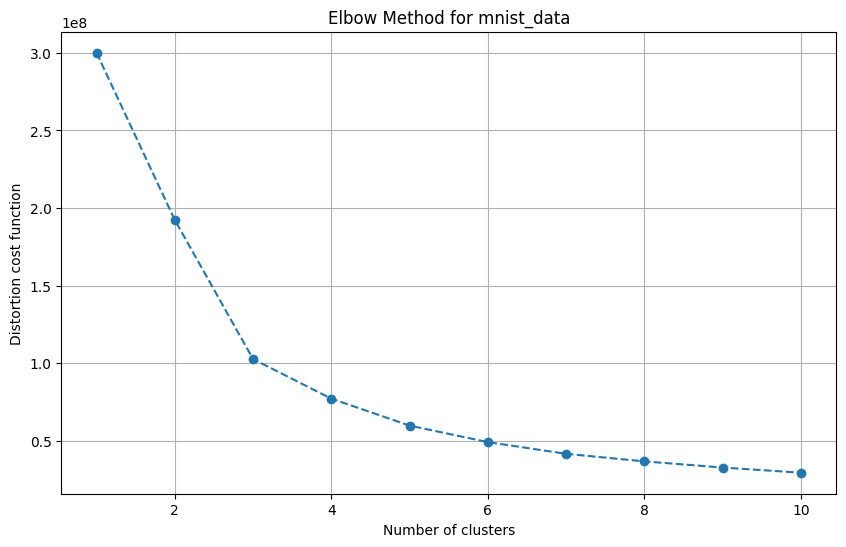

In [65]:
# Застосування K-means кластеризації та визначення оптимальної кількості кластерів
wcss_mnist = []
for i in range(1, 11):
    kmeans_mnist = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_mnist.fit(mnist_2d)
    wcss_mnist.append(kmeans_mnist.inertia_)

# Візуалізація ліктевого графіка
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_mnist, marker='o', linestyle='--')
plt.title('Elbow Method for mnist_data')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion cost function')
plt.grid(True)
plt.show()

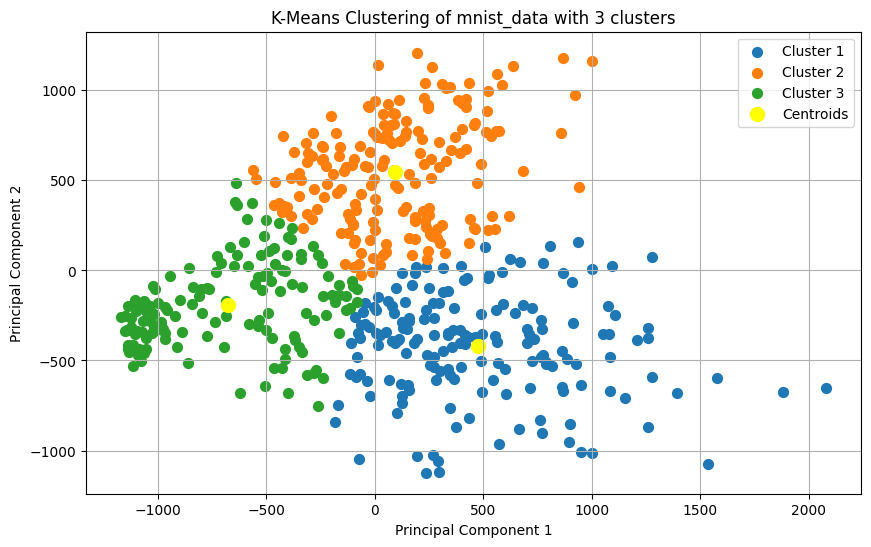

In [66]:
# Вибір оптимальної кількості кластерів за ліктевим методом
optimal_clusters_mnist = 3

# Застосування K-means кластеризації з оптимальною кількістю кластерів
kmeans_mnist_optimal = KMeans(n_clusters=optimal_clusters_mnist, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_mnist_optimal = kmeans_mnist_optimal.fit_predict(mnist_2d)

# Візуалізація результатів кластеризації з оптимальною кількістю кластерів
plt.figure(figsize=(10, 6))
for cluster_label in range(optimal_clusters_mnist):
    plt.scatter(mnist_2d[y_kmeans_mnist_optimal == cluster_label, 0],
                mnist_2d[y_kmeans_mnist_optimal == cluster_label, 1],
                s=50, label=f'Cluster {cluster_label + 1}')

plt.scatter(kmeans_mnist_optimal.cluster_centers_[:, 0], kmeans_mnist_optimal.cluster_centers_[:, 1],
            s=100, c='yellow', label='Centroids')
plt.title(f'K-Means Clustering of mnist_data with {optimal_clusters_mnist} clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()